In [1]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:

def plot_NQueens(solution, fig = None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    # im = im.resize((int(100 / n), int(100 / n)))
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    # NQueensCSP gives a solution as a dictionary
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    # NQueensProblem gives a solution as a list
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()
    # return fig
    

C:\Users\mahma\AppData\Local\Temp\ipykernel_9304\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


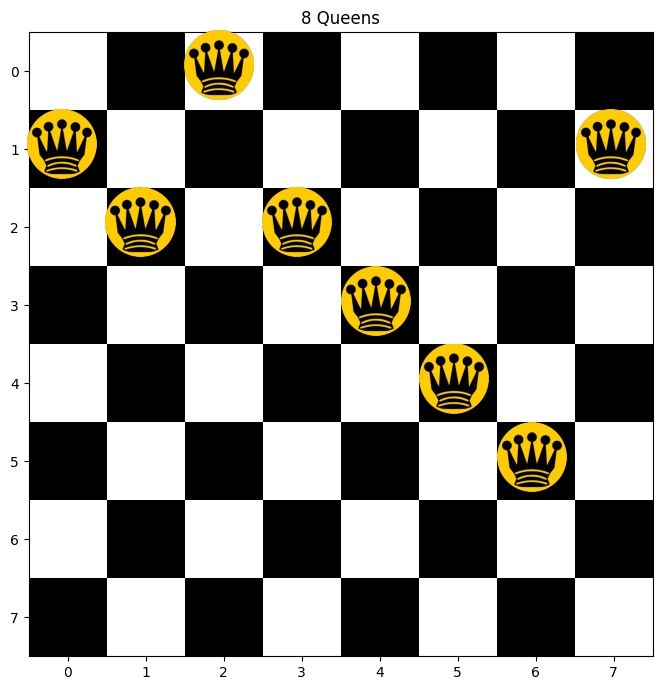

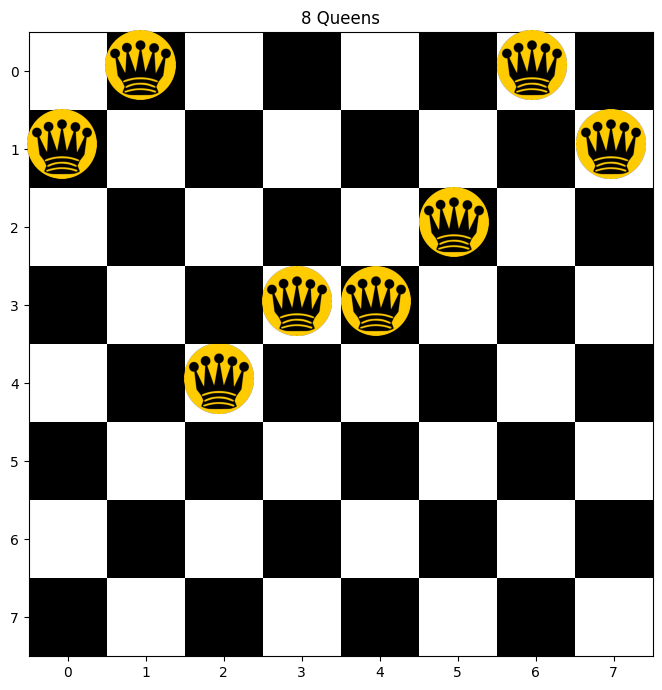

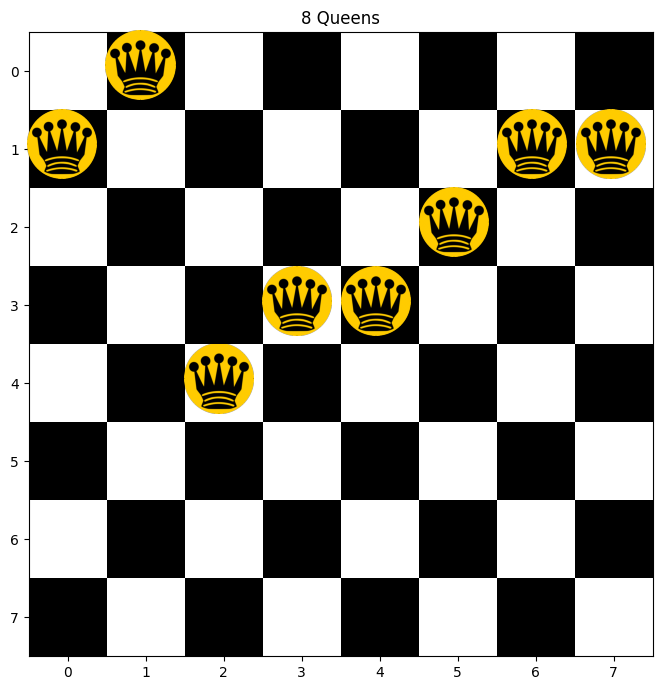

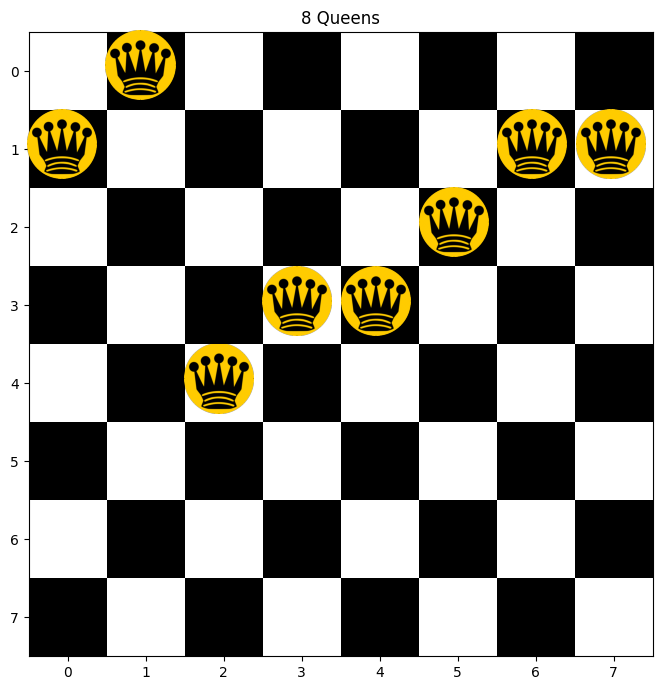

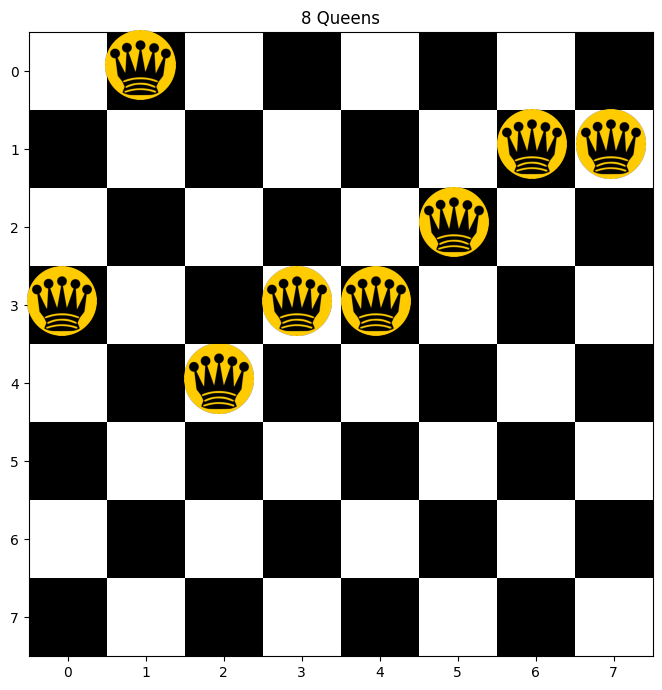

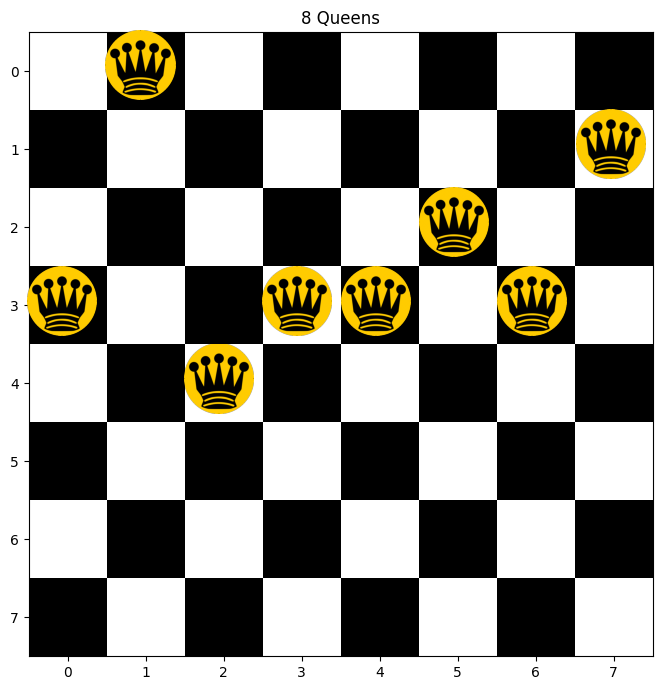

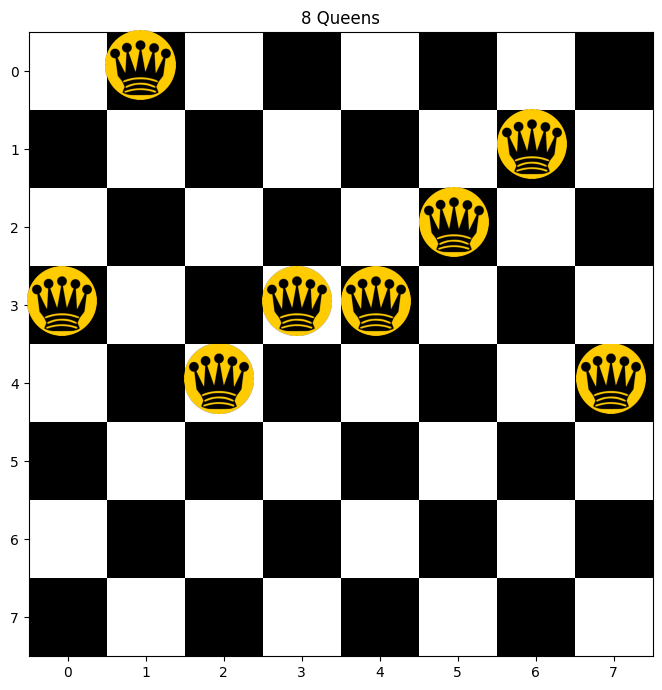

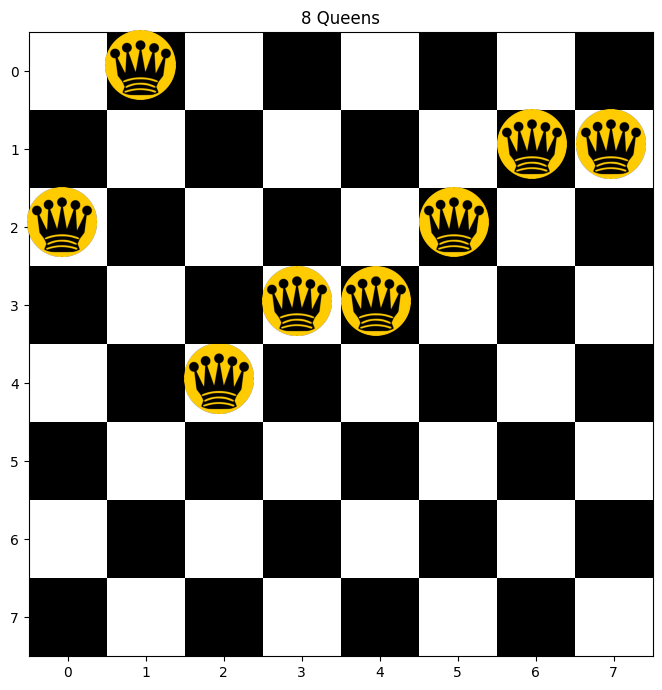

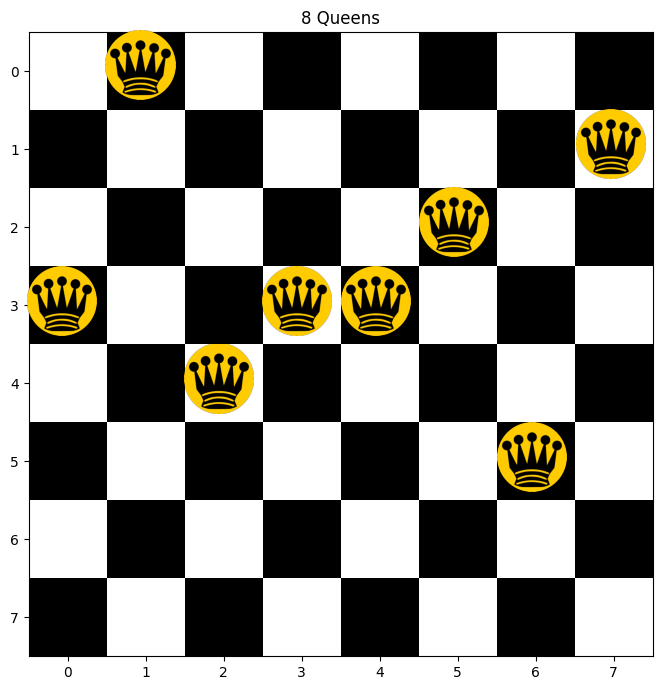

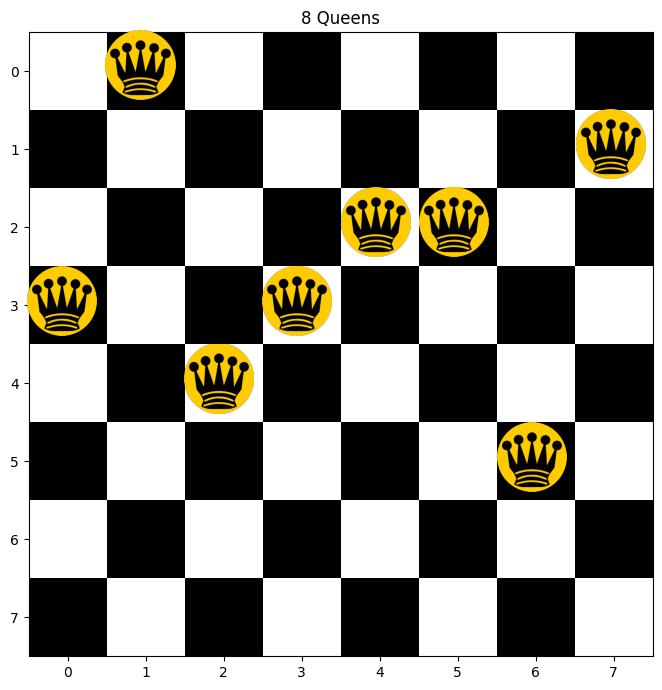

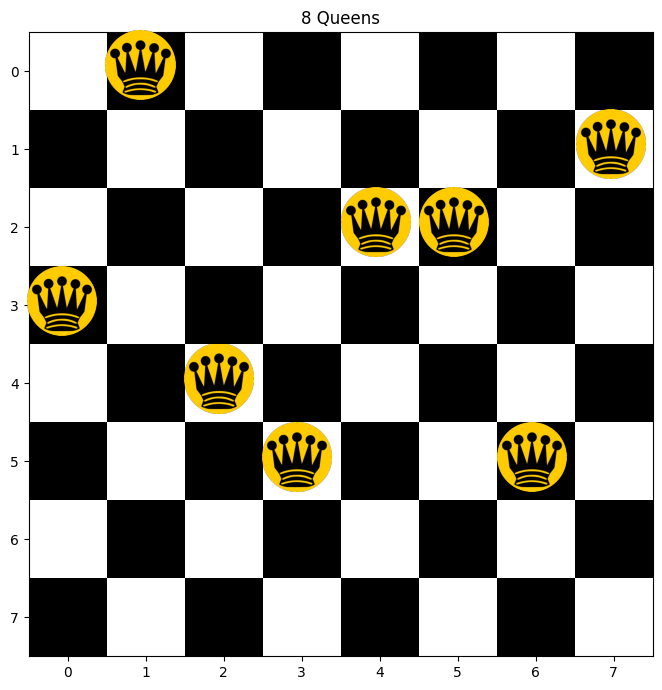

Final board configuration with no attacking queens:
[3, 0, 4, 3, 2, 2, 5, 1]


In [3]:

import random
"""
Use this block to do your assignment
"""
initial_state = [1,2,0,2,3,4,5,1] #do not use this state. Initialize random position to each queen.
nqp = NQueensProblem(len(initial_state)) #give number of queens as an argument.
plot_NQueens(initial_state) # to print the state everytime something changes. You can give an array of position of each queen.
# plot_NQueens( [1,2,2,3,2,4,6,1])

# Function to compute the number of attacking queens in a given board configuration
def calculate_attacks(board):
    n = len(board)
    attacks = 0
    for i in range(n):
        for j in range(i+1, n):
            if board[i] == board[j] or abs(i - j) == abs(board[i] - board[j]):
                attacks += 1
    return attacks

# Function to generate a random initial board configuration
def generate_random_board():
    return [random.randint(0, 7) for _ in range(8)]

# Function to generate a successor by randomly moving any queen to another place in its column
def generate_successor(board):
    new_board = board[:]
    col = random.randint(0, 7)
    new_row = random.randint(0, 7)
    new_board[col] = new_row
    return new_board

# Stochastic hill climbing algorithm
def stochastic_hill_climbing():
    i = 0
    current_board = generate_random_board()
    current_attacks = calculate_attacks(current_board)
    
    while current_attacks > 0:
        i = i + 1
        successor = generate_successor(current_board)
        plot_NQueens(successor)
        successor_attacks = calculate_attacks(successor)
        
        if successor_attacks < current_attacks:
            current_board = successor
            current_attacks = successor_attacks

        if i == 10:
            break
    return current_board

# Main function to test the algorithm
def main():
    random.seed(42)  # Set the seed for reproducibility
    final_board = stochastic_hill_climbing()
    print("Final board configuration with no attacking queens:")
    print(final_board)

if __name__ == "__main__":
    main()
